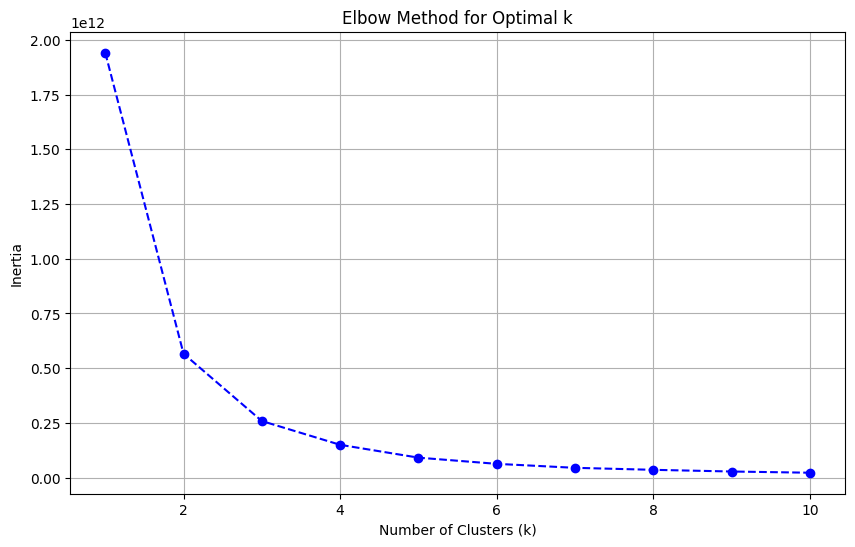

Silhouette Score for 4 clusters: 0.56


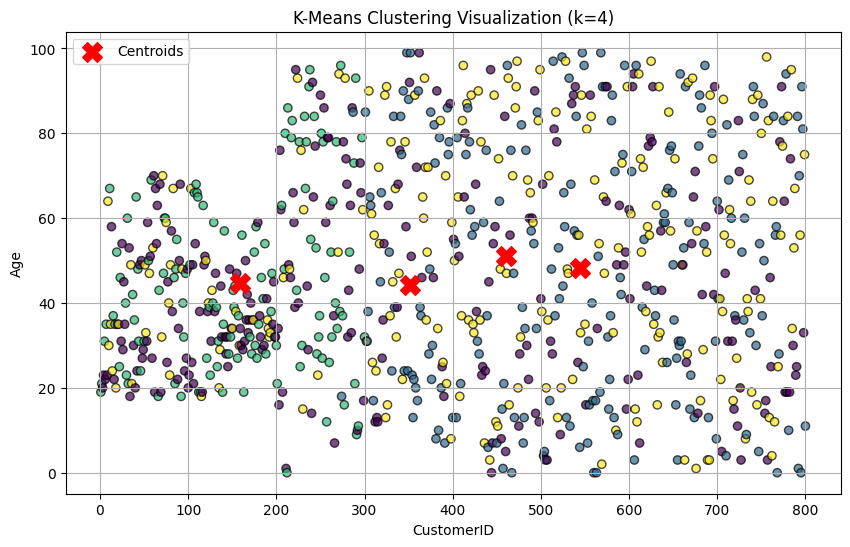

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('Dataset.csv')

# Drop non-numeric columns (if any)
df_numeric = df.select_dtypes(include=[np.number])

# Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Checking clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method Graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Choose optimal k (update based on elbow point)
optimal_k = 4  

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_numeric)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_numeric, df['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}')

# Visualizing Clusters (Selecting first two features)
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.title(f'K-Means Clustering Visualization (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()
